In [1]:
#!pip install https://github.com/neuropsychology/NeuroKit.py/zipball/master

In [1]:
# Import packages
import neurokit as nk
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
# Download data
#df = pd.read_csv("ecg_records.csv")
df = pd.read_csv("ecg_records.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52770 entries, 0 to 52769
Data columns (total 2 columns):
ts     52770 non-null int64
val    52770 non-null int64
dtypes: int64(2)
memory usage: 824.6 KB


### Find average record per second

In [4]:
df['datetime'] = pd.to_datetime(df['ts'],unit='ms')

In [5]:
df['second'] = df['datetime'].dt.second

In [6]:
total_seconds = (df.iloc[df.shape[0]-1]['datetime'] - df.iloc[0]['datetime']).seconds

In [7]:
len(df)/total_seconds

120.75514874141876

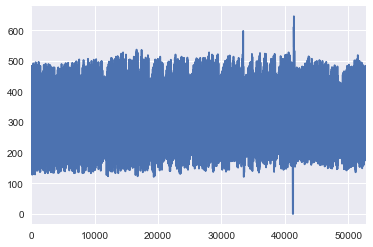

In [8]:
df['val'].plot()

In [9]:
df['val'].describe()

count    52770.000000
mean       330.335285
std         49.002621
min          0.000000
25%        306.000000
50%        315.000000
75%        350.000000
max        646.000000
Name: val, dtype: float64

//anaconda/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
//anaconda/lib/python3.6/site-packages/sklearn/base.py:253: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.20.2 when using version 0.20.3. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


    Using multitaper spectrum estimation with 7 DPSS windows


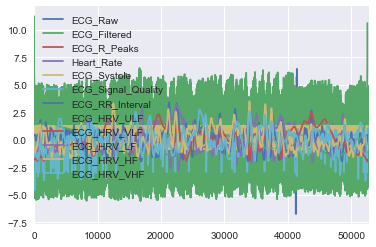

In [18]:
# Process the signals
bio = nk.ecg_process(ecg=df["val"], sampling_rate=121, age=26, sex='m')
# Plot the processed dataframe, normalizing all variables for viewing purpose
nk.z_score(bio["df"]).plot()

### ECG Signal quality

In [19]:
bio["ECG"]["Average_Signal_Quality"]  # Get average quality

0.8743954236159576

### Heart Beats / Cardiac Cycles

(72, 593)


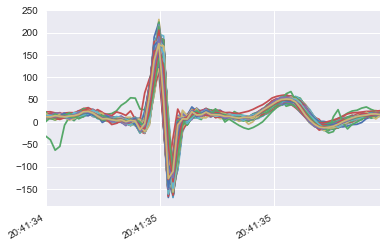

In [20]:
_ = bio["ECG"]["Cardiac_Cycles"]
print(_.shape)
_ = pd.DataFrame(_).plot(legend=False)  # Plot all the heart beats

In [25]:
bio['ECG'].keys()

dict_keys(['R_Peaks', 'Cardiac_Cycles', 'T_Waves', 'P_Waves', 'Q_Waves', 'S_Waves', 'Q_Waves_Onsets', 'T_Waves_Onsets', 'T_Waves_Ends', 'Probable_Lead', 'Cardiac_Cycles_Signal_Quality', 'Average_Signal_Quality', 'ECG_Signal_Quality', 'HRV'])

### Heart Rate Variability (HRV)

In [13]:
# taken from this https://www.sciencedirect.com/science/article/pii/S0735109797005548
# for age 20-29
hrv = {
    'research' : {
        '20–29': {
            'SDNN' : '153 ± 44 ms',
            'SDANN': '137 ± 43 ms',
            'rMSSD': '43 ± 19 ms',
            'pNN50': '18 ± 13 %',
            'HR': '79 ± 10 beats/min'
        }
        
    }
}

In [34]:
print("sdNN",bio["ECG"]["HRV"]['sdNN'])
print("RMSSD",bio["ECG"]["HRV"]['RMSSD'])
print("pNN50",bio["ECG"]["HRV"]['pNN50'])
print("HR", bio["df"]['Heart_Rate'].mean())

sdNN 64.08410453610463
RMSSD 39.612947350512016
pNN50 12.755102040816327
HR 81.80096164069437


In [16]:
#bio["ECG"]["HRV"]

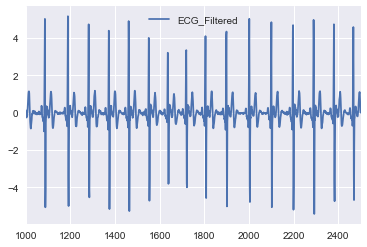

In [17]:
nk.z_score(bio["df"][["ECG_Filtered"]])[1000:2500].plot()

In [36]:
bio["df"][["ECG_Filtered"]].to_csv("ecg_filtered.csv", index=False)